In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import copy

from matplotlib import rc
rc('text', usetex=True)
mpl.rcParams['axes.formatter.use_mathtext']=True
mpl.rcParams['figure.dpi']=90
wid=1.0
mpl.rcParams['axes.linewidth'] = wid #set the value globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Times']

mpl.rcParams['font.weight'] = 1.0

In [4]:
def example_3dSurfacePlt():
    surfaceX = np.load("../src/temp_storage/SurfaceX_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    surfaceV = np.load("../src/temp_storage/SurfaceV_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    dkdl = np.load("../src/temp_storage/dkdz_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    ctheta = np.load("../src/temp_storage/ctheta_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec__NS_Mag_0.00067_NS_Theta_1.571_.npz")
    
    rr = np.sqrt(np.sum(surfaceX**2, axis=1))
    vv = np.sqrt(np.sum(surfaceV**2, axis=1))
    dkdlBen = 3 * 1e-6 / (2 * rr * vv * 2.998e5) / 6.58e-16
    
    fig = plt.figure(figsize=(7,7))
    
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect(aspect = (1,1,1))
    cmap2 = copy.copy(matplotlib.cm.get_cmap('viridis'))
    clr = np.log10(ctheta * ((dkdl[:,0]/dkdlBen)**(-1)))
    
    clr[clr>3] = 3
    clr[clr<-2] = -2
    
    p = ax.scatter(surfaceX[:,0], surfaceX[:,1], surfaceX[:,2], s=.2, edgecolors=None, c=clr, cmap=cmap2, alpha=0.5)
    ax.view_init(elev=20., azim=-70)
    #ax.clim(-1, 1)
    maxD = 120
    ax.set_xlim3d([-maxD, maxD])
    ax.set_ylim3d([-maxD, maxD])
    ax.set_zlim3d([-maxD, maxD])
    ax.set_xlabel('x   [km]', fontsize=14)
    ax.set_ylabel('y   [km]',  fontsize=14)
    ax.set_zlabel('z   [km]',  fontsize=14)
    cb = fig.colorbar(p, shrink=0.45)
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('k')
    ax.yaxis.pane.set_edgecolor('k')
    ax.zaxis.pane.set_edgecolor('k')
    ax.xaxis.pane.set_alpha(.5)
    ax.yaxis.pane.set_alpha(.5)
    ax.zaxis.pane.set_alpha(.5)
    ax.plot3D([-maxD, -maxD], [-135, -135], [-maxD, 128], 'k', lw=1, alpha=0.5)
    

    cb.ax.set_title(r"$\log_{10}\left(\frac{L_c^2 \cos\tilde{\theta} }{ L_{c, {\rm{analytic}}}^2}\right)$ ",fontsize=14, pad=30)
    fig.tight_layout()
    fig.savefig("../plots/Surface_ConversionLength.png", dpi=200)
    return
    
    

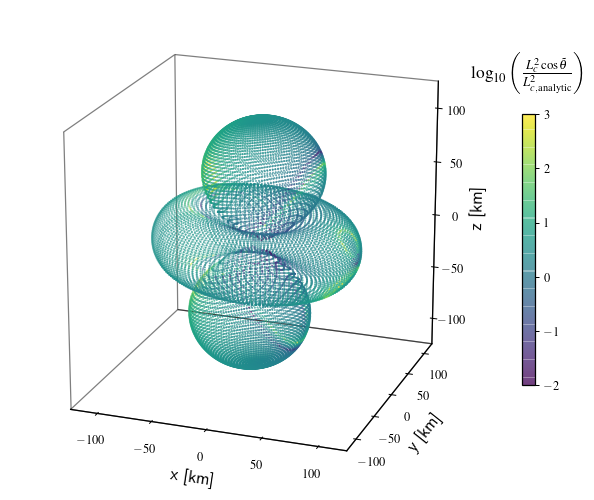

In [35]:
example_3dSurfacePlt()

In [52]:
dkdl = np.load("temp_storage/dkdz_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec_NS_velZ_0.0007_.npz")
surfaceX = np.load("temp_storage/SurfaceX_PhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.0_sec_NS_velZ_0.0007_.npz")
rr = np.sqrt(np.sum(surfaceX**2, axis=1))

In [17]:
def PopulationPlots_Join_Both(files1, files2, labelL, ftag,  sve=False):
    fs=16
    fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True, gridspec_kw={'hspace': 0.00, 'wspace':0.04}) 

    binsL_NFW = np.logspace(-16, -9, 200)
    binsL_PL = np.logspace(-19, -9, 200)
    
    color_list = ['#143642', '#0F8B8D', '#976391', '#A8201A', '#EC9A29', 'tab:purple','tab:blue', 'tab:olive', 'tab:brown']
    for i in range(2):
        ax[i].tick_params(direction='in', length=8, width=1, labelsize=16)#, colors='r',grid_color='r', grid_alpha=0.5)
        ax[i].tick_params(which='minor', direction='in', length=6, width=1, labelsize=12) 
        ax[i].tick_params(axis='y',which='major', length = 10, labelsize = 16, pad=3)
        ax[i].tick_params(axis='y',which='minor', length = 5, labelsize = 16)
        ax[i].tick_params(axis='x',which='major', length = 10, labelsize = 16, pad=5.5)
        ax[i].tick_params(axis='x',which='minor', length = 5, labelsize = 16)
        if i == 0:
            ax[i].set_xlim([binsL_NFW[0], binsL_NFW[-1]]);
            ax[i].set_ylabel(r"$f_{obs}$", fontsize=19)
        else:
            ax[i].set_xlim([binsL_PL[0], binsL_PL[-1]]);
        ax[i].set_yscale('log') 
        ax[i].set_xscale('log')
        ax[i].set_xlabel(r"$g_{a\gamma \gamma} \hspace{.4cm} [{\rm GeV}^{-1}]$", fontsize=19)
        ax[i].xaxis.set_tick_params(width=wid)
        ax[i].xaxis.set_tick_params(which='minor',width=wid)
        ax[i].yaxis.set_tick_params(width=wid)
        ax[i].yaxis.set_tick_params(which='minor',width=wid)
        ax[i].set_ylim([5e-4, 1]);

#     if nfw:
#         shiftY = .15
#         ymax = 1e-2
        
    ax[0].axhline(y=0.00116, color='k', ls='-.', lw=1)
    ax[1].axhline(y=0.073529, color='k', ls='-.', lw=1)
#         # ax.axvline(x=7e-11, color='k', ls='--', lw=1)
    ax[0].axvspan(7e-11, 1e-8, alpha=0.2, color='#4E937A')
    ax[1].axvspan(7e-11, 1e-8, alpha=0.2, color='#4E937A')
    ax[0].text(8e-11, 0.2, r'CAST',  c='#4E937A', ha='left', fontsize=13, rotation=-90); 
    ax[1].text(3e-19, 0.073529*1.3, r'$N_{\rm obs}$ = 1', ha='left', fontsize=13);
    ax[1].text(3e-19, 0.073529*0.6, r'[$t_{\rm obs}$ = 100 hrs]', ha='left', fontsize=13);
    
    ax[0].text(1e-12, 1e-1, r'NFW',  c='k', ha='left', fontsize=20, rotation=0); 
    ax[1].text(1e-12, 1e-3, r'PL',  c='k', ha='left', fontsize=20, rotation=0); 
        
#         ax.text(5e-15, 0.00116*1.1, r'1 evnt / 100 obs. hrs.', ha='left', fontsize=13);
#         ax.text(8e-11, 3e-3, r'CAST', c='#4E937A', ha='left', fontsize=13, rotation=-90);
#         ax.text(1.7e-16, 5e-4, r'NFW', ha='left', fontsize=13);
#         ax.text(1.7e-16, 5e-4/10**shiftY, r'$t_{bin}$ = 1 day', ha='left', fontsize=13);
#         ax.text(1.7e-16, 5e-4/10**(2*shiftY), r'$\Delta f / m_a = 10^{-4}$', ha='left', fontsize=13);
#     else:
#         shiftY = .2
#         ymax = 5e-1
#         ax.set_ylim([5e-4, ymax]);
#         ax.axhline(y=0.073529, color='k', ls='-.', lw=1)
#         #ax.axvline(x=7e-11, color='k', ls='--', lw=1)
#         ax.axvspan(7e-11, 1e-8, alpha=0.2, color='#4E937A')
        
#         
#         ax.text(5e-15, 0.073529*1.1, r'1 evnt / 100 obs. hrs.', ha='left', fontsize=13);
#         ax.text(2e-19, 1e-2, r'PL', ha='left', fontsize=13);
#         ax.text(2e-19, 1e-2/10**shiftY, r'$t_{bin}$ = 1 day', ha='left', fontsize=13);
#         ax.text(2e-19, 1e-2/10**(2*shiftY), r'$\Delta f / m_a = 10^{-4}$', ha='left', fontsize=13);
    for i in range(len(files1)):
        fileLoad = np.loadtxt('../src/amc_glims/'+files[i])
        if len(fileLoad) > 0:
            weights = np.ones(len(fileLoad)) / 5e3
            ax[0].hist(fileLoad, bins=binsL_NFW, weights=weights, cumulative=True, log=True, histtype='step', color=color_list[i], linewidth=1.2)
            ax[0].text(2e-16, 0.8 / 10**(.3*(i+1)), labelL[i], ha='left', fontsize=13, color=color_list[i]);
        else:
            ax[0].text(2e-16, 0.8 / 10**(.3*(i+1)), labelL[i], ha='left', fontsize=13, color=color_list[i]);
            pass
    
    ax[0].text(2e-16, 0.8 / 10**(.3*(6+1)), 'SKA-Mid', ha='left', fontsize=13, color='k');
    for i in range(len(files2)):
        fileLoad = np.loadtxt('../src/amc_glims/'+files2[i])
        if len(fileLoad) > 0:
            weights = np.ones(len(fileLoad)) / 1e3
            ax[1].hist(fileLoad, bins=binsL_PL, weights=weights, cumulative=True, log=True, histtype='step', color=color_list[i], linewidth=1.2)
            #ax[1].text(2e-19, 0.5 / 1.4 / 10**(.3*(i+1)), labelL[i], ha='left', fontsize=13, color=color_list[i]);
        else:
            pass
    if sve:
        fig.savefig("/Users/samuelwitte/Desktop/Magnetized_Plasma/Axion_Infall/plots/FObs_Joint_.png", dpi=200)
    return



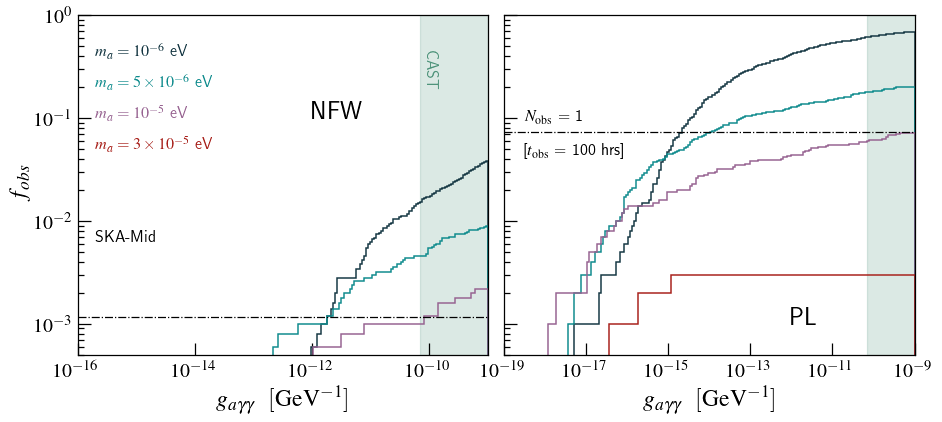

In [18]:
file1= "glim__SKA_Mid__NFW_AxionMass_1.00e-06_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
file2= "glim__SKA_Mid__NFW_AxionMass_5.00e-06_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
file3= "glim__SKA_Mid__NFW_AxionMass_1.00e-05_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
file4= "glim__SKA_Mid__NFW_AxionMass_3.00e-05_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
files = [file1, file2, file3, file4]

files2_1 = "glim__SKA_Mid__PL_AxionMass_1.00e-06_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
files2_2 = "glim__SKA_Mid__PL_AxionMass_5.00e-06_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
files2_3 = "glim__SKA_Mid__PL_AxionMass_1.00e-05_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
files2_4 = "glim__SKA_Mid__PL_AxionMass_3.00e-05_Bwdith_1.00e-06_Tbin_0.250_days_.dat"
files2 = [files2_1, files2_2, files2_3, files2_4]


labelL = [r"$m_a = 10^{-6}$ eV", r"$m_a = 5 \times 10^{-6}$ eV", r"$m_a = 10^{-5}$ eV", r"$m_a = 3 \times 10^{-5}$ eV"]
ftag = ""


PopulationPlots_Join_Both(files, files2, labelL, ftag, sve=True)